Predicting the Weather with Neural Networks
===========================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("weatherData.csv")
df.head(10)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,E,0,...,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
1,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,ENE,6,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
2,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,WNW,0,...,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
3,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,NNW,11,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
4,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,SW,13,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes
5,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,NE,4,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,Yes,No
6,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,NNE,15,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,No,No
7,3.2,20.4,0.0,1.4,6.9,NNW,24.0,NE,N,9,...,58.0,42.0,1023.9,1021.1,6.0,5.0,10.2,19.3,No,Yes
8,9.8,19.5,8.0,1.2,2.5,ESE,31.0,NaN,ESE,0,...,97.0,64.0,1026.4,1024.9,7.0,6.0,12.1,18.7,Yes,Yes
9,11.2,20.4,4.6,2.8,1.7,NNW,46.0,NE,NNE,19,...,79.0,50.0,1020.2,1014.0,7.0,7.0,13.4,19.0,Yes,Yes


In [3]:
wind_attributes = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Cardinal direction to radians
dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
angles = np.arange(0.0, 2.0*np.pi, 2.0*np.pi / 16.0)
wind_angles = dict(zip(dirs, angles))
print(wind_angles)
for var in wind_attributes:
    df[var] = df[var].map(wind_angles)
    df[var + '_cos'] = np.cos(df[var])
    df[var + '_sin'] = np.sin(df[var])
    df = df.drop(columns=var)
df.head()


{'N': 0.0, 'NNE': 0.39269908169872414, 'NE': 0.7853981633974483, 'ENE': 1.1780972450961724, 'E': 1.5707963267948966, 'ESE': 1.9634954084936207, 'SE': 2.356194490192345, 'SSE': 2.748893571891069, 'S': 3.141592653589793, 'SSW': 3.5342917352885173, 'SW': 3.9269908169872414, 'WSW': 4.319689898685965, 'W': 4.71238898038469, 'WNW': 5.105088062083414, 'NW': 5.497787143782138, 'NNW': 5.890486225480862}


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
0,2.7,18.8,0.0,0.8,9.1,20.0,0,7.0,97.0,53.0,...,8.5,18.1,No,No,3.826834e-01,0.923880,NaN,NaN,6.123234e-17,1.000000
1,6.4,20.7,0.0,1.8,7.0,22.0,6,9.0,80.0,39.0,...,11.1,19.7,No,No,7.071068e-01,0.707107,-3.826834e-01,0.923880,3.826834e-01,0.923880
2,6.5,19.9,0.4,2.2,7.3,31.0,0,4.0,84.0,71.0,...,12.1,17.7,No,Yes,7.071068e-01,0.707107,NaN,NaN,3.826834e-01,-0.923880
3,9.5,19.2,1.8,1.2,4.7,26.0,11,6.0,93.0,73.0,...,13.2,17.7,Yes,Yes,-1.836970e-16,-1.000000,9.238795e-01,0.382683,9.238795e-01,-0.382683
4,9.5,16.4,1.8,1.4,4.9,44.0,13,17.0,69.0,57.0,...,15.9,16.0,Yes,Yes,-3.826834e-01,-0.923880,-1.836970e-16,-1.000000,-7.071068e-01,-0.707107


In [4]:
df = df.dropna()


In [5]:
bools = ['RainToday', 'RainTomorrow']
for var in bools:
    df[var] = df[var].map({
        'Yes': 1,
        'No': 0
    })
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
1,6.4,20.7,0.0,1.8,7.0,22.0,6,9.0,80.0,39.0,...,11.1,19.7,0,0,7.071068e-01,0.707107,-3.826834e-01,0.923880,0.382683,0.923880
3,9.5,19.2,1.8,1.2,4.7,26.0,11,6.0,93.0,73.0,...,13.2,17.7,1,1,-1.836970e-16,-1.000000,9.238795e-01,0.382683,0.923880,-0.382683
4,9.5,16.4,1.8,1.4,4.9,44.0,13,17.0,69.0,57.0,...,15.9,16.0,1,1,-3.826834e-01,-0.923880,-1.836970e-16,-1.000000,-0.707107,-0.707107
5,0.7,15.9,6.8,2.4,9.3,24.0,4,7.0,86.0,41.0,...,6.9,15.5,1,0,9.238795e-01,0.382683,3.826834e-01,0.923880,0.707107,0.707107
6,0.7,18.3,0.0,0.8,9.3,37.0,15,13.0,72.0,36.0,...,8.7,17.9,0,0,1.000000e+00,0.000000,7.071068e-01,0.707107,0.923880,0.382683


In [6]:
y = df["RainTomorrow"]
X = df.drop(columns="RainTomorrow")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33,
    random_state=0
)
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (2026, 23)
X_test (999, 23)


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print(X_train.shape)

(2026, 23)


In [10]:
print(y_train.shape)

(2026,)


In [11]:
print(X_test.shape)

(999, 23)


In [12]:
print(y_test.shape)

(999,)


GaussianNB

In [13]:
classifier=GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
classifier.score(X_train, y_train)

0.8529121421520237

In [15]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8698698698698699


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       792
           1       0.65      0.82      0.72       207

    accuracy                           0.87       999
   macro avg       0.80      0.85      0.82       999
weighted avg       0.89      0.87      0.88       999



MLP

In [17]:
classifier = MLPClassifier(
    hidden_layer_sizes=(50,50),
    max_iter=500,
    random_state=0
)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=0)

In [18]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8928928928928929


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       792
           1       0.76      0.71      0.73       207

    accuracy                           0.89       999
   macro avg       0.84      0.83      0.83       999
weighted avg       0.89      0.89      0.89       999



KNN

In [20]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
print(accuracy_score(y_test, y_pred))

0.8878878878878879


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       792
           1       0.80      0.62      0.70       207

    accuracy                           0.89       999
   macro avg       0.85      0.79      0.81       999
weighted avg       0.88      0.89      0.88       999



SVC

In [23]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred))

0.9049049049049049


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       792
           1       0.86      0.65      0.74       207

    accuracy                           0.90       999
   macro avg       0.89      0.81      0.84       999
weighted avg       0.90      0.90      0.90       999



In [54]:
accuracy = [0.86, 0.88, 0.89, 0.90]
models = ['GaussianNB', 'KNN', 'MLP', 'SVC']

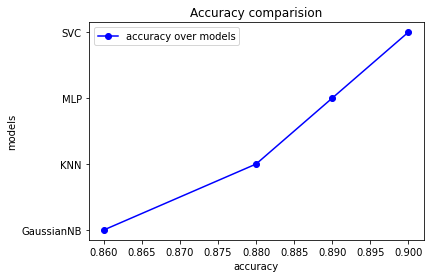

In [55]:
plt.plot(accuracy, models,'b-o', label = 'accuracy over models')
plt.xlabel('accuracy')
plt.ylabel('models')
plt.title ('Accuracy comparision')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

In [29]:
parameters = {
    'hidden_layer_sizes': (
        (2,), (10,), (50,50),
    )
}
nn = MLPClassifier(max_iter=2000, random_state=0)
gridsearch = GridSearchCV(nn, parameters, cv=3)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000, random_state=0),
             param_grid={'hidden_layer_sizes': ((2,), (10,), (50, 50))})

In [30]:
print(gridsearch.cv_results_['params'])
print(gridsearch.cv_results_['mean_test_score'])

[{'hidden_layer_sizes': (2,)}, {'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50, 50)}]
[0.90424355 0.89487179 0.88450873]


In [31]:
best_nn = gridsearch.best_estimator_
y_pred = best_nn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8938938938938938
